### Data sources

. GDP Source: World Bank national accounts data, and OECD National Accounts data files.

. Life expectancy Data Source: World Health Organization

In [72]:
# Import the libraries that we
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [337]:
# Inspect the data

# load the csv file into a pandas dataframe
df = pd.read_csv("all_data.csv")

# Inspect the first five rows
df.head(5)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [338]:
# How this data is conformed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


We can see that the data is composed of a total of 4 columns and that they have 96 entries each. Fortunately, there are no missing values in the columns, so we can start working with the data right now.
The other thing that we can see is that the dtypes are all correct.

In [339]:
# What countries are considered in these data?
print(pd.unique(df.Country))

# What years are considered in these data?
print(pd.unique(df.Year))

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Cool!, we can see that the countries considered in this database are:
1. Chile
2. China
3. Germany
4. Mexico
5. USA
6. Zimbabwe

In respect to the year column, this database considers only the period between 2000 and 2015.

# # Let's start by looking at life expectancy in general.

To do this, we can do 3 different plots to know how the data is spread in each country.

I'll use the next plots: Violinplot, Barplot and a Histogram.

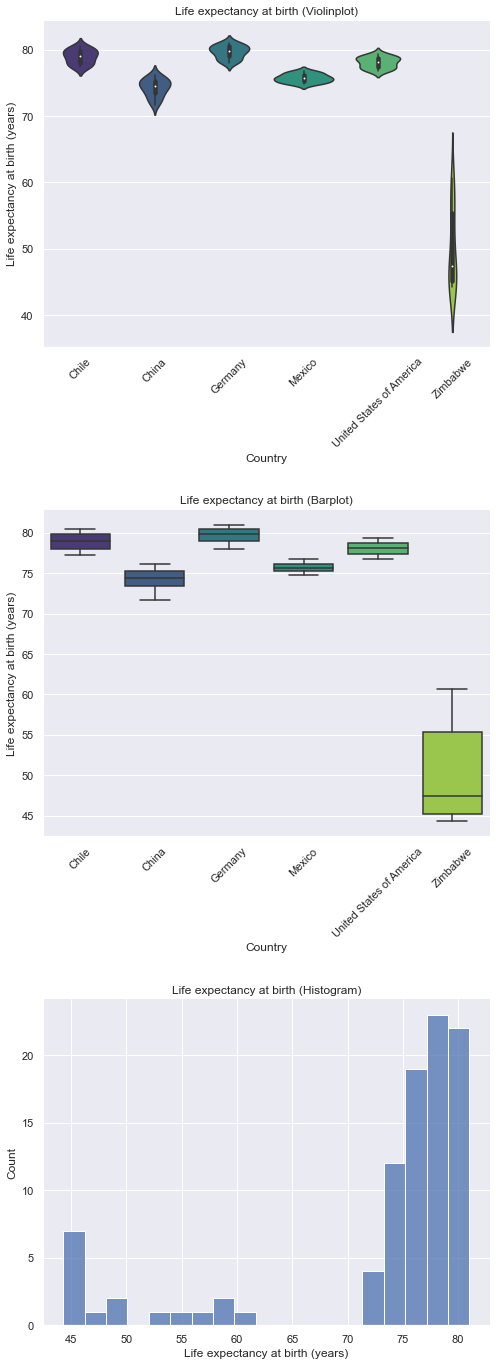

In [340]:
# figsize
fig = plt.figure(figsize=(8,24))

# stablish the style and palette of the plots
sns.set_style("darkgrid")
sns.color_palette("viridis", as_cmap=True)

# Subplot #1
plt.subplot(3,1,1)
plt.title('Life expectancy at birth (Violinplot)')
plt.xticks(rotation=45)
sns.violinplot(data=df, x="Country", y="Life expectancy at birth (years)", palette="viridis")

# subplot #2
plt.subplot(3,1,2)
plt.title('Life expectancy at birth (Barplot)')
plt.xticks(rotation=45)
sns.boxplot(data=df, x="Country", y="Life expectancy at birth (years)", palette="viridis")

# subplot #3
plt.subplot(3,1,3)
plt.title('Life expectancy at birth (Histogram)')
sns.histplot(df["Life expectancy at birth (years)"])
    
# Aesthetics
plt.subplots_adjust(hspace=0.5)

sns.despine()
plt.show()

Looking at the graphs, we can see that in most cases (except Zimbabwe), the LEAB is between the values ​​of 70 and 80 years. On the other hand, we can see that Zimbabwe is the only country that has the most extended data in LEAB, with values ​​that are around 45 and 55 years old, and with some outliers that reach 60 years.

# # Has life expectancy increased over time in the six nations?

To answer this question, we can make a bar chart or a line chart. Why not plot both? Let's do it.

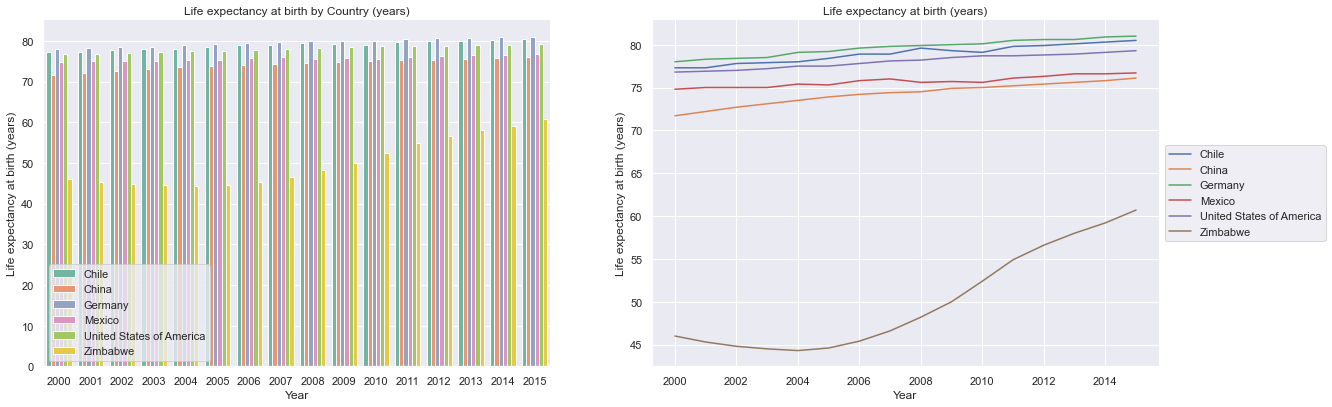

In [393]:
# figsize
fig = plt.figure(figsize=(20,14))

# stablish the style and palette
sns.set_style("darkgrid")
sns.color_palette("viridis", as_cmap=True)

# Subplot #1
plt.subplot(2,2,1)
plt.title('Life expectancy at birth by Country (years)')
sns.barplot(data=df, x="Year", y="Life expectancy at birth (years)", hue="Country", palette="Set2")
plt.legend(loc='lower left')

# subplot #2
plt.subplot(2,2,2)
plt.title('Life expectancy at birth (years)')
sns.lineplot(data=df, x="Year", y="Life expectancy at birth (years)", hue="Country")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# Aesthetics
sns.despine()
plt.show()

In [345]:
# What is the difference between the average LEAB in the year 2000 and the average LEAB in the year 2015.

life_expectancy_mean_2000 = np.mean(df["Life expectancy at birth (years)"][df.Year == 2000])

life_expectancy_mean_2015 = np.mean(df["Life expectancy at birth (years)"][df.Year == 2015])

avg_difference = life_expectancy_mean_2015 - life_expectancy_mean_2000

print("The average LEAB in the year 2000 was of {}".format(life_expectancy_mean_2000))
print("The average LEAB in the year 2015 was of {}".format(life_expectancy_mean_2015))

if avg_difference >= 0:
    print("Life expectancy has increased by {} years on average, from 2000 to 2015.".format(diferencia_media))
else:
    print("Life expectancy has increased by {} years on average, from 2000 to 2015.".format(diferencia_media))

The average LEAB in the year 2000 was of 70.76666666666667
The average LEAB in the year 2015 was of 75.71666666666667
Life expectancy has increased by 4.950000000000003 years on average, from 2000 to 2015.


Interesting, we can see that in all nations, LEAB has increased over time. The case of Zimbabwe is striking, which has had a much higher growth rate compared to other nations.

What if we analyze in more details these graphs but for every nation?

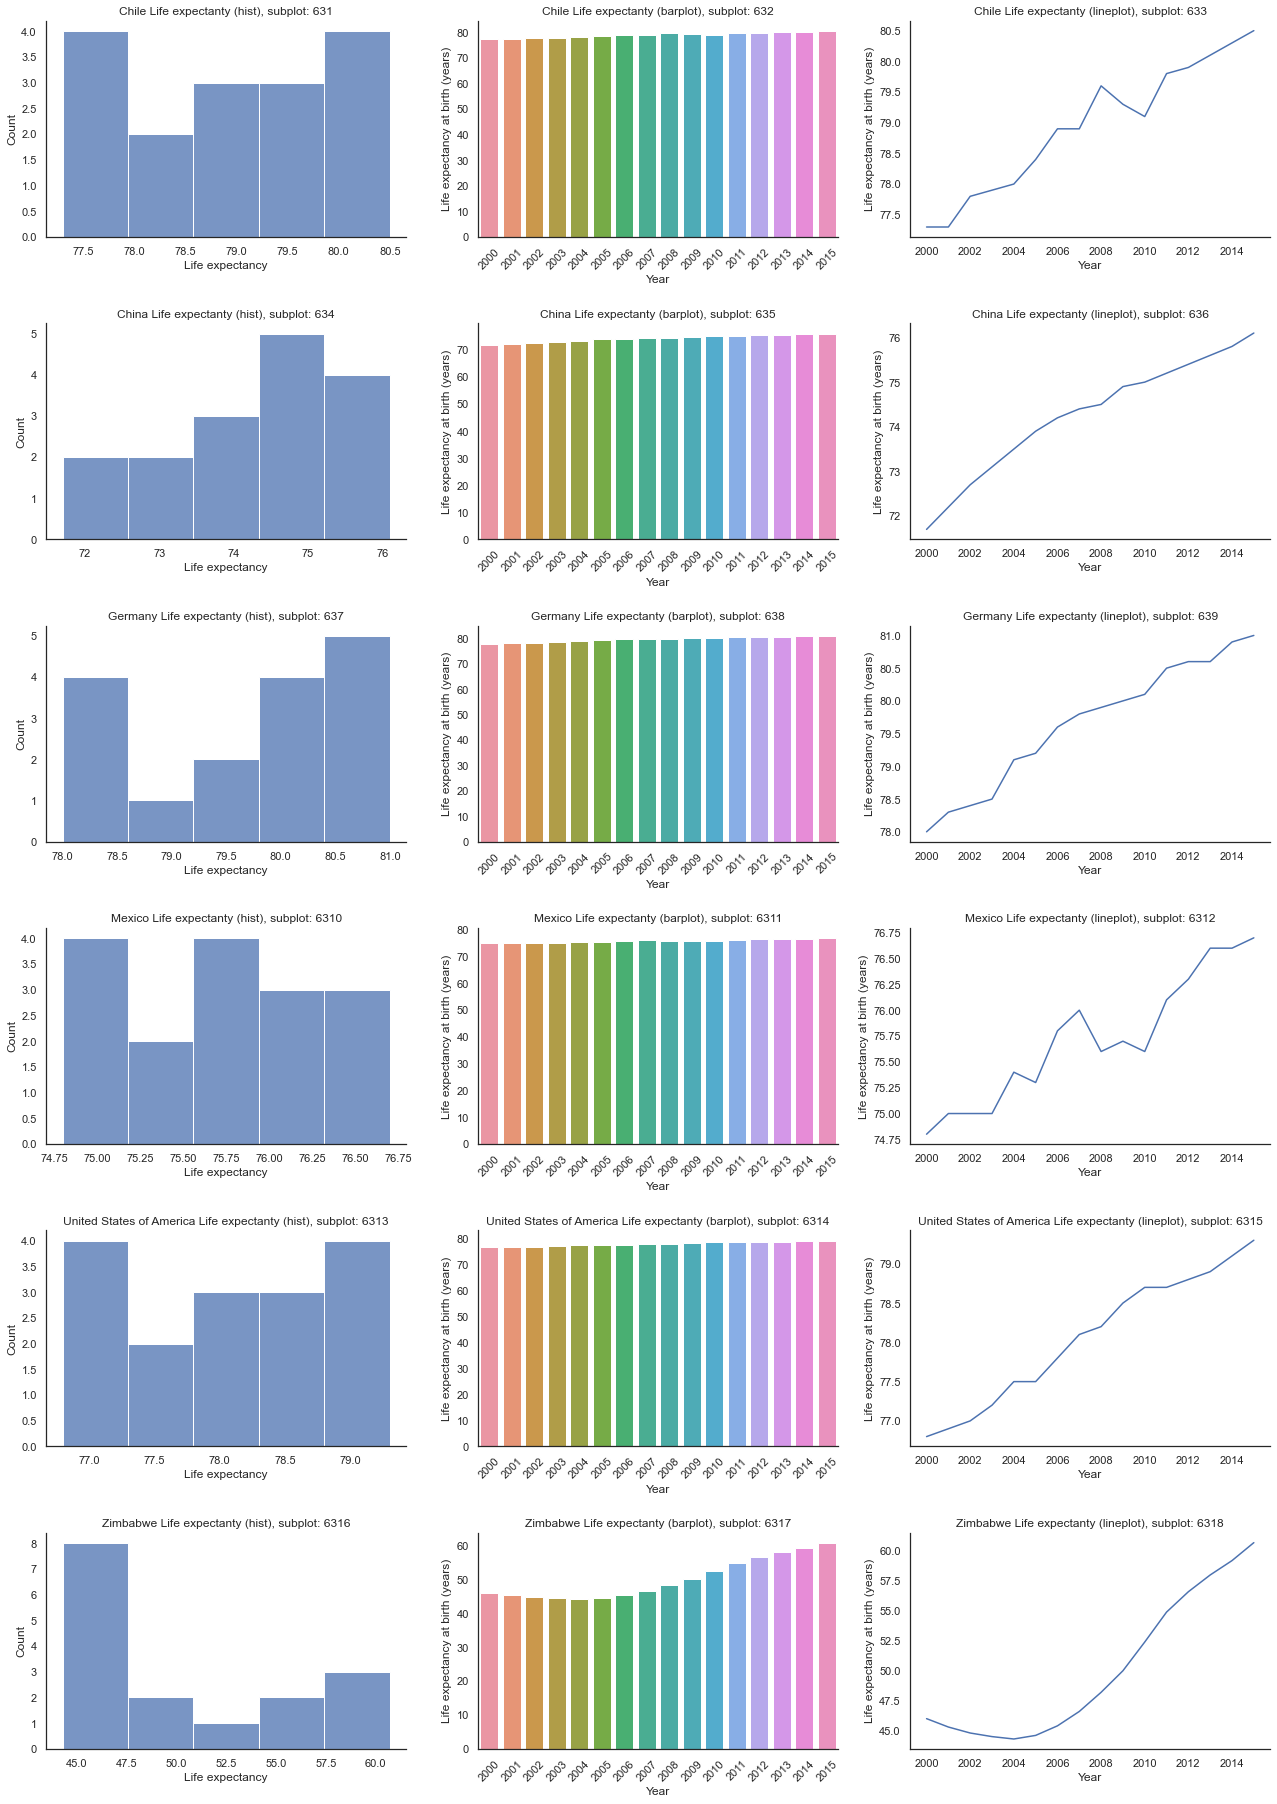

In [347]:
#  Make a list of the nations
country_list = df.Country.unique()

#  plot Numerical Data
a = len(country_list)  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,30))
sns.set_style("white")

for i in country_list:
    plt.subplot(a, b, c)
    plt.title('{} Life expectanty (hist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel("Life expectancy")  
    sns.histplot(df["Life expectancy at birth (years)"][df.Country == i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} Life expectanty (barplot), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.xticks(rotation=45)
    sns.barplot(data=df[df.Country == i], x="Year", y="Life expectancy at birth (years)")
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} Life expectanty (lineplot), subplot: {}{}{}'.format(i, a, b, c))
    sns.lineplot(data=df[df.Country == i], x="Year", y="Life expectancy at birth (years)")
    c = c + 1
    
    plt.subplots_adjust(left=0.05,
                    bottom=0.2, 
                    right=0.9, 
                    top=1, 
                    wspace=0.2, 
                    hspace=0.4)

sns.despine()
plt.show()

I wonder what happened in Zimbabwe since 2004.

The last questions about LEAB:

1. What is the average for each nation?

In [407]:
# To answer this question, we can group these data by the mean.

df_mean = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()

df_mean[["Country", "Life expectancy at birth (years)"]].sort_values(by=['Life expectancy at birth (years)'], ascending=False)

,Country,Life expectancy at birth (years)
2,Germany,79.65625
0,Chile,78.94375
4,United States of America,78.06250
3,Mexico,75.71875
1,China,74.26250
5,Zimbabwe,50.09375


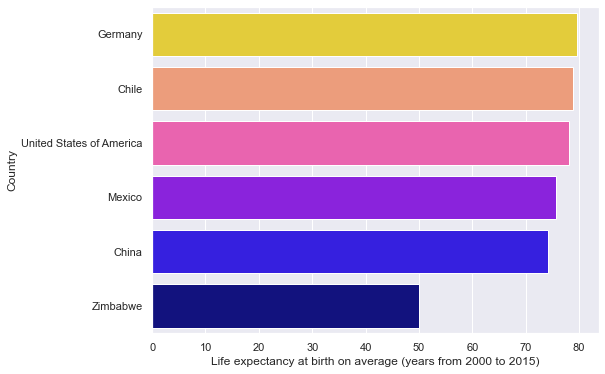

In [381]:
plt.figure(figsize=(8,6))
sns.barplot(x="Life expectancy at birth (years)", y="Country", data=df_mean, palette="gnuplot2_r")
plt.xlabel("Life expectancy at birth on average (years from 2000 to 2015)");

# # Analyzing the GDP of the 6 nations

Now, we can do a similar process but analyzing the GPD column

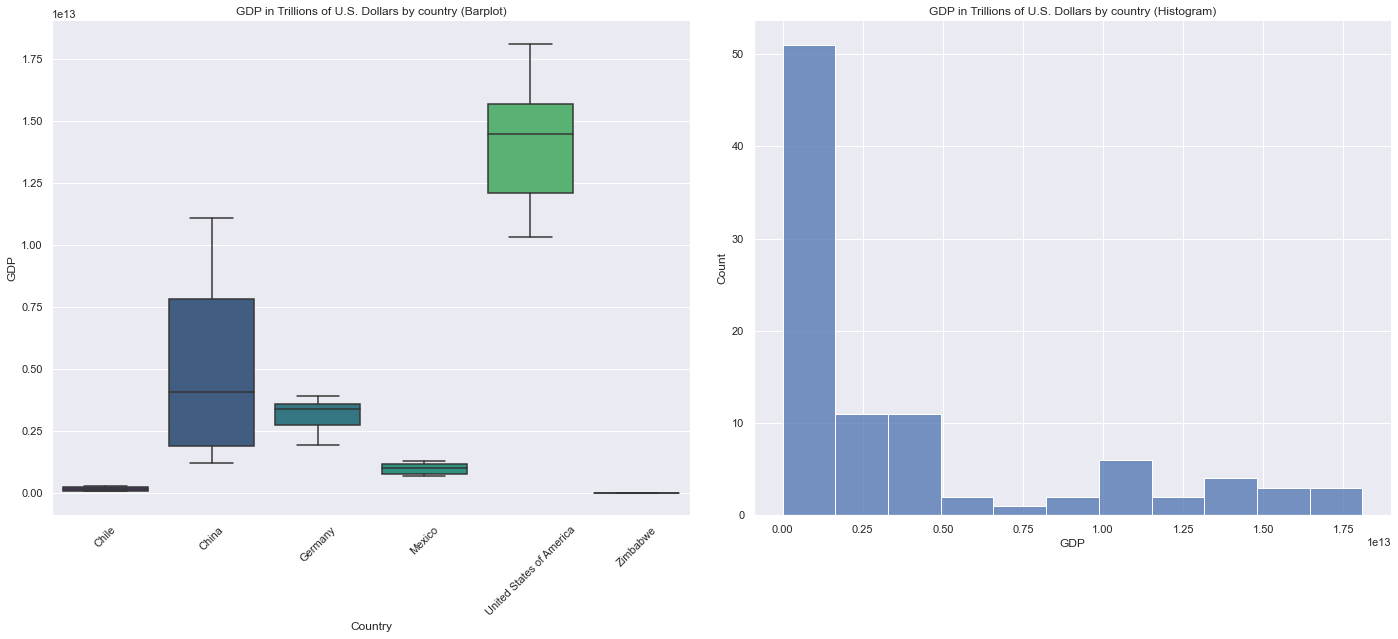

In [385]:
# figsize
fig = plt.figure(figsize=(24,20))

# stablish the style and palette
sns.set_style("darkgrid")
sns.color_palette("viridis", as_cmap=True)

# subplot #1
plt.subplot(2,2,1)
plt.title('GDP in Trillions of U.S. Dollars by country (Barplot)')
plt.xticks(rotation=45)
sns.boxplot(data=gdp, x="Country", y="GDP", palette="viridis")

# subplot #2
plt.subplot(2,2,2)
plt.title('GDP in Trillions of U.S. Dollars by country (Histogram)')
sns.histplot(gdp["GDP"])
    
# Aesthetics
plt.subplots_adjust(wspace=0.1)

sns.despine()
plt.show()

We can see that GDP (in trillions of US dollars) is, in most cases (except for China and the US), Below the value of 0.5.

Has GDP increased over time in the six nations?

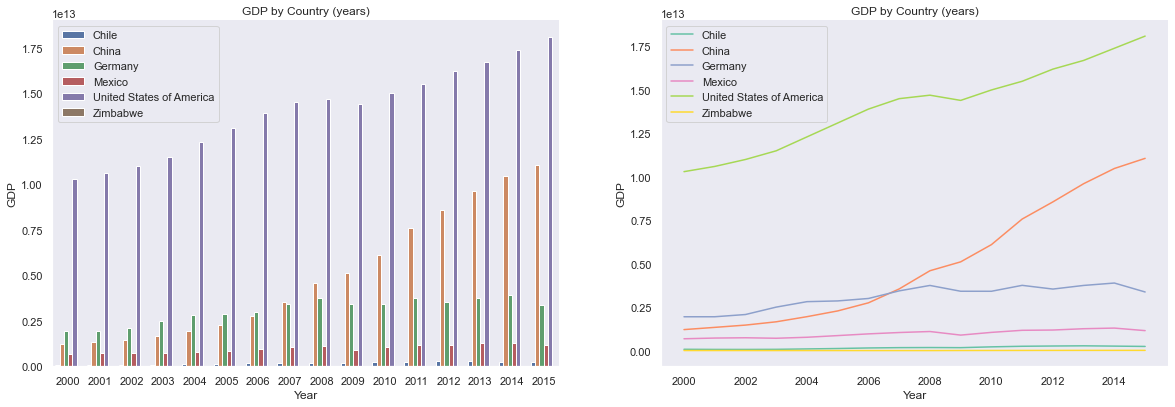

In [387]:
# figsize
fig = plt.figure(figsize=(20,14))

# stablish the style and palette
sns.set_style("dark")
sns.color_palette("viridis", as_cmap=True)

# Subplot #1
plt.subplot(2,2,1)
plt.title('GDP by Country (years)')
sns.barplot(data=gdp, x="Year", y="GDP", hue="Country")
plt.legend(loc='upper left')

# subplot #2
plt.subplot(2,2,2)
plt.title('GDP by Country (years)')
sns.lineplot(data=gdp, x="Year", y="GDP", hue="Country", palette="Set2")
plt.legend(loc='upper left')

# Aesthetics
plt.subplots_adjust(wspace=0.2)
sns.despine()
plt.show()

Yes, although they growth at different rates, all nations are better, in terms of GDP, compared to the year 2000.

Perhaps, we cannot see this growth well in each country because there are two countries (China and the US) that had a great difference in this area. What happens if we detail each country?

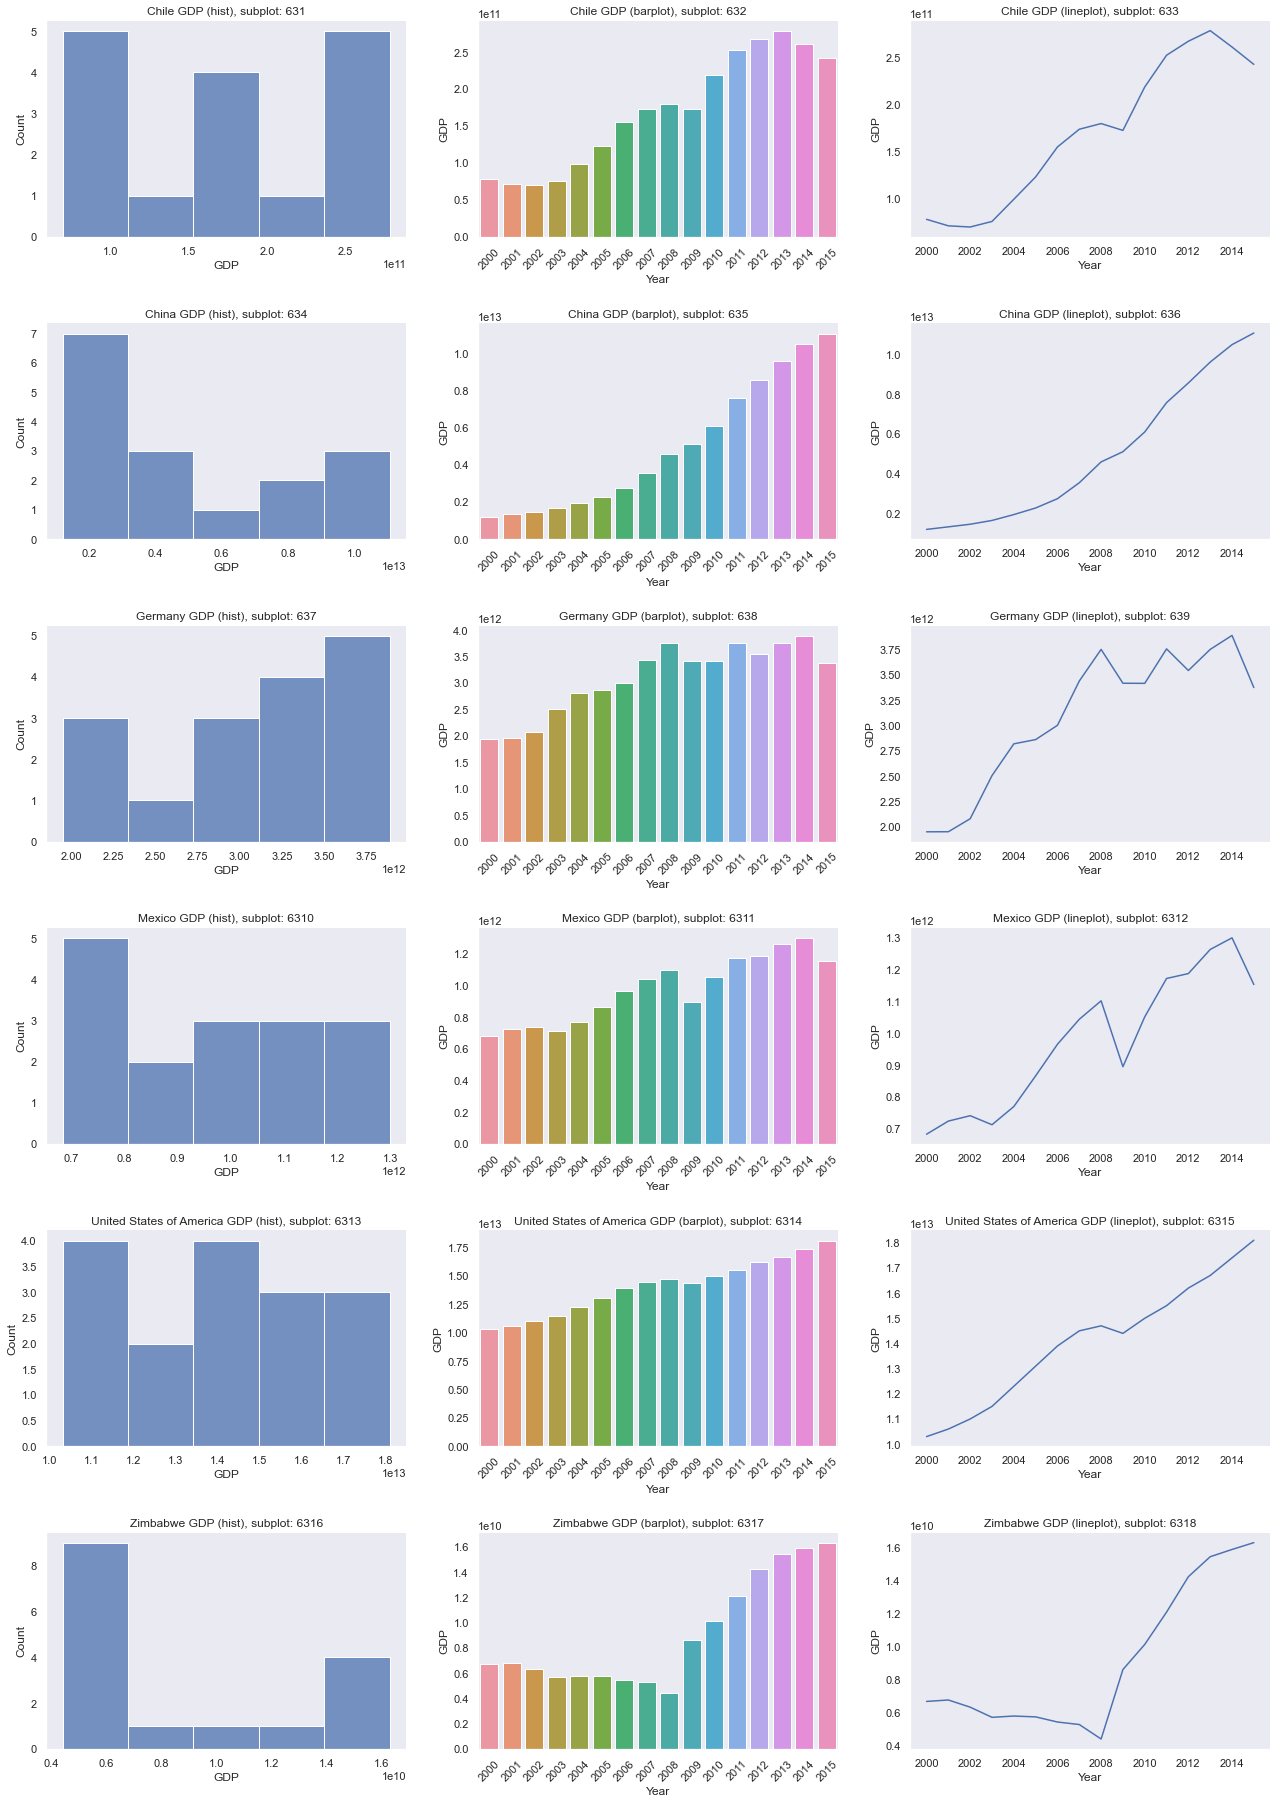

In [384]:
#  Lista de naciones
country_list = np.array(gdp.Country.unique())

#  plot Numerical Data
a = len(country_list)  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,30))
sns.set_style("dark")

for i in country_list:
    plt.subplot(a, b, c)
    plt.title('{} GDP (hist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel("GDP")   
    sns.histplot(gdp["GDP"][gdp.Country == i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} GDP (barplot), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.xticks(rotation=45)
    sns.barplot(data=gdp[gdp.Country == i], x="Year", y="GDP")
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} GDP (lineplot), subplot: {}{}{}'.format(i, a, b, c))
    sns.lineplot(data=gdp[gdp.Country == i], x="Year", y="GDP")
    c = c + 1
    
    plt.subplots_adjust(left=0.05,
                    bottom=0.2, 
                    right=0.9, 
                    top=1, 
                    wspace=0.2, 
                    hspace=0.4)

sns.despine()
plt.show()

Now we can better see the growth of each country in terms of GDP.

In [408]:
df_mean[["Country", "GDP"]].sort_values(by=['GDP'], ascending=False)

,Country,GDP
4,United States of America,1.407500e+13
1,China,4.957714e+12
2,Germany,3.094776e+12
3,Mexico,9.766506e+11
0,Chile,1.697888e+11
5,Zimbabwe,9.062580e+09


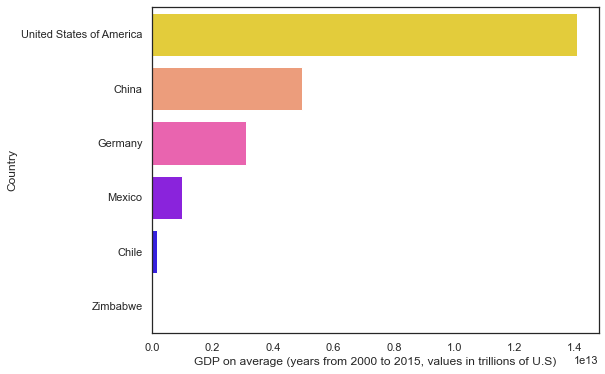

In [412]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=df_mean.sort_values(by=['GDP'], ascending=False), palette="gnuplot2_r")
plt.xlabel("GDP on average (years from 2000 to 2015, values in trillions of U.S)");

For the average GDP by Country it seems that the US has a much higher value compared to the rest of the countries. In this bar plot, Zimbabwe is not even visible where Chile is just barely seen. In comparison the USA has a huge GDP compared to the rest. China, Germany and Mexico seem to be relatively close in figures.

In [109]:
# What is the difference from the average GDP between 2000 and 2015?

gdp_mean_2000 = np.mean(gdp["GDP"][gdp.Year == 2000])

gdp_mean_2015 = np.mean(gdp["GDP"][gdp.Year == 2015])

gdp_diferencia_media = gdp_mean_2015 - gdp_mean_2000

print("El GDP medio en el año 2000 fue de {}".format(gdp_mean_2000))
print("El GDP medio en el año 2015 fue de {}".format(gdp_mean_2015))

if gdp_diferencia_media >= 0:
    print("El GDP medio ha aumentado {} años en promedio, desde el 2000 hacia el 2015".format(gdp_diferencia_media))
else:
    print("El GDP medio ha aumentado ha aumentado {} años en promedio, desde el 2000 hacia el 2015".format(gdp_diferencia_media))

El GDP medio en el año 2000 fue de 2371583148292.0
El GDP medio en el año 2015 fue de 5658565444634.5
El GDP medio ha aumentado 3286982296342.5 años en promedio, desde el 2000 hacia el 2015


Is there a correlation between GDP and life expectancy of a country?

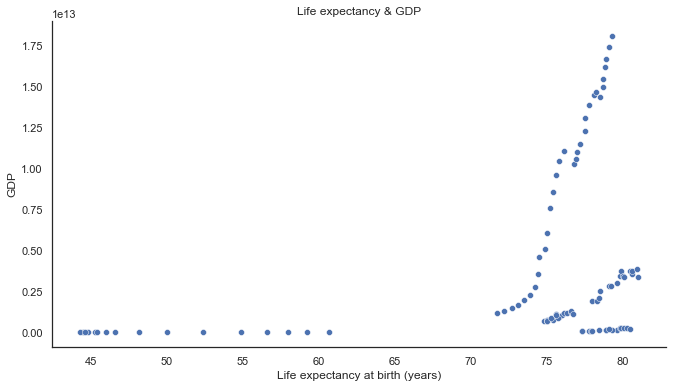

In [390]:
# To answer this question we can do a scatter plot

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))
sns.set_style("white")

# Visualizar la data y separarla por cada nación
sns.scatterplot(data=gdp, x="Life expectancy at birth (years)", y="GDP")
sns.despine()

# Colocar títulos y etiquetas
plt.title("Life expectancy & GDP")
plt.show()

What if we see this data but divided by each country?

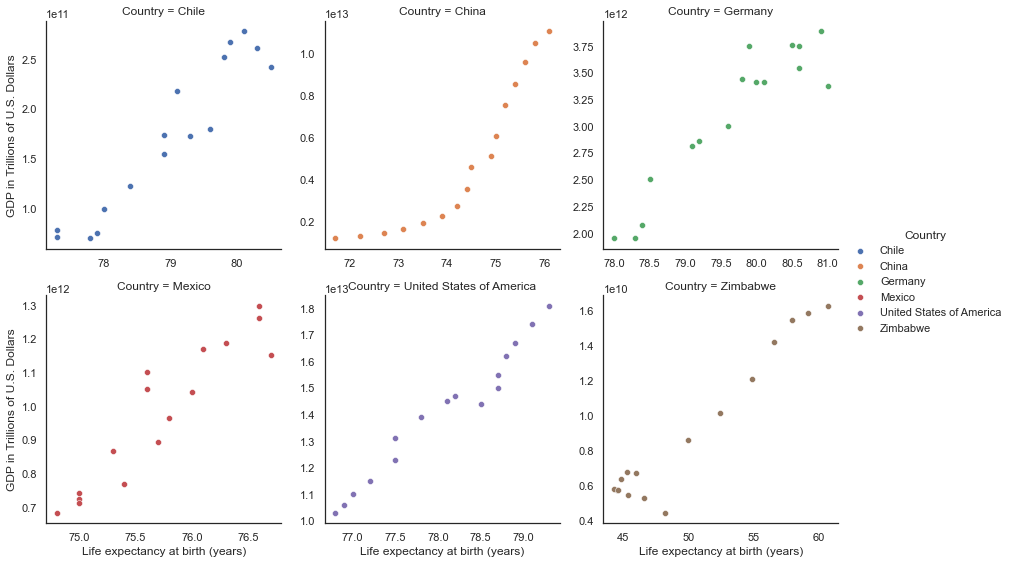

In [404]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3, height=4,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"Life expectancy at birth (years)", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));

Looking at the individual countries, most countries like the US, Mexico and Zimbabwe have linear relationships between GDP and life expectancy. China on the other hand has a slightly exponential curve, and Chile's looks a bit logarithmic. In general though one can see an increase in GDP and life expectancy, exhibiting a positive correlation.